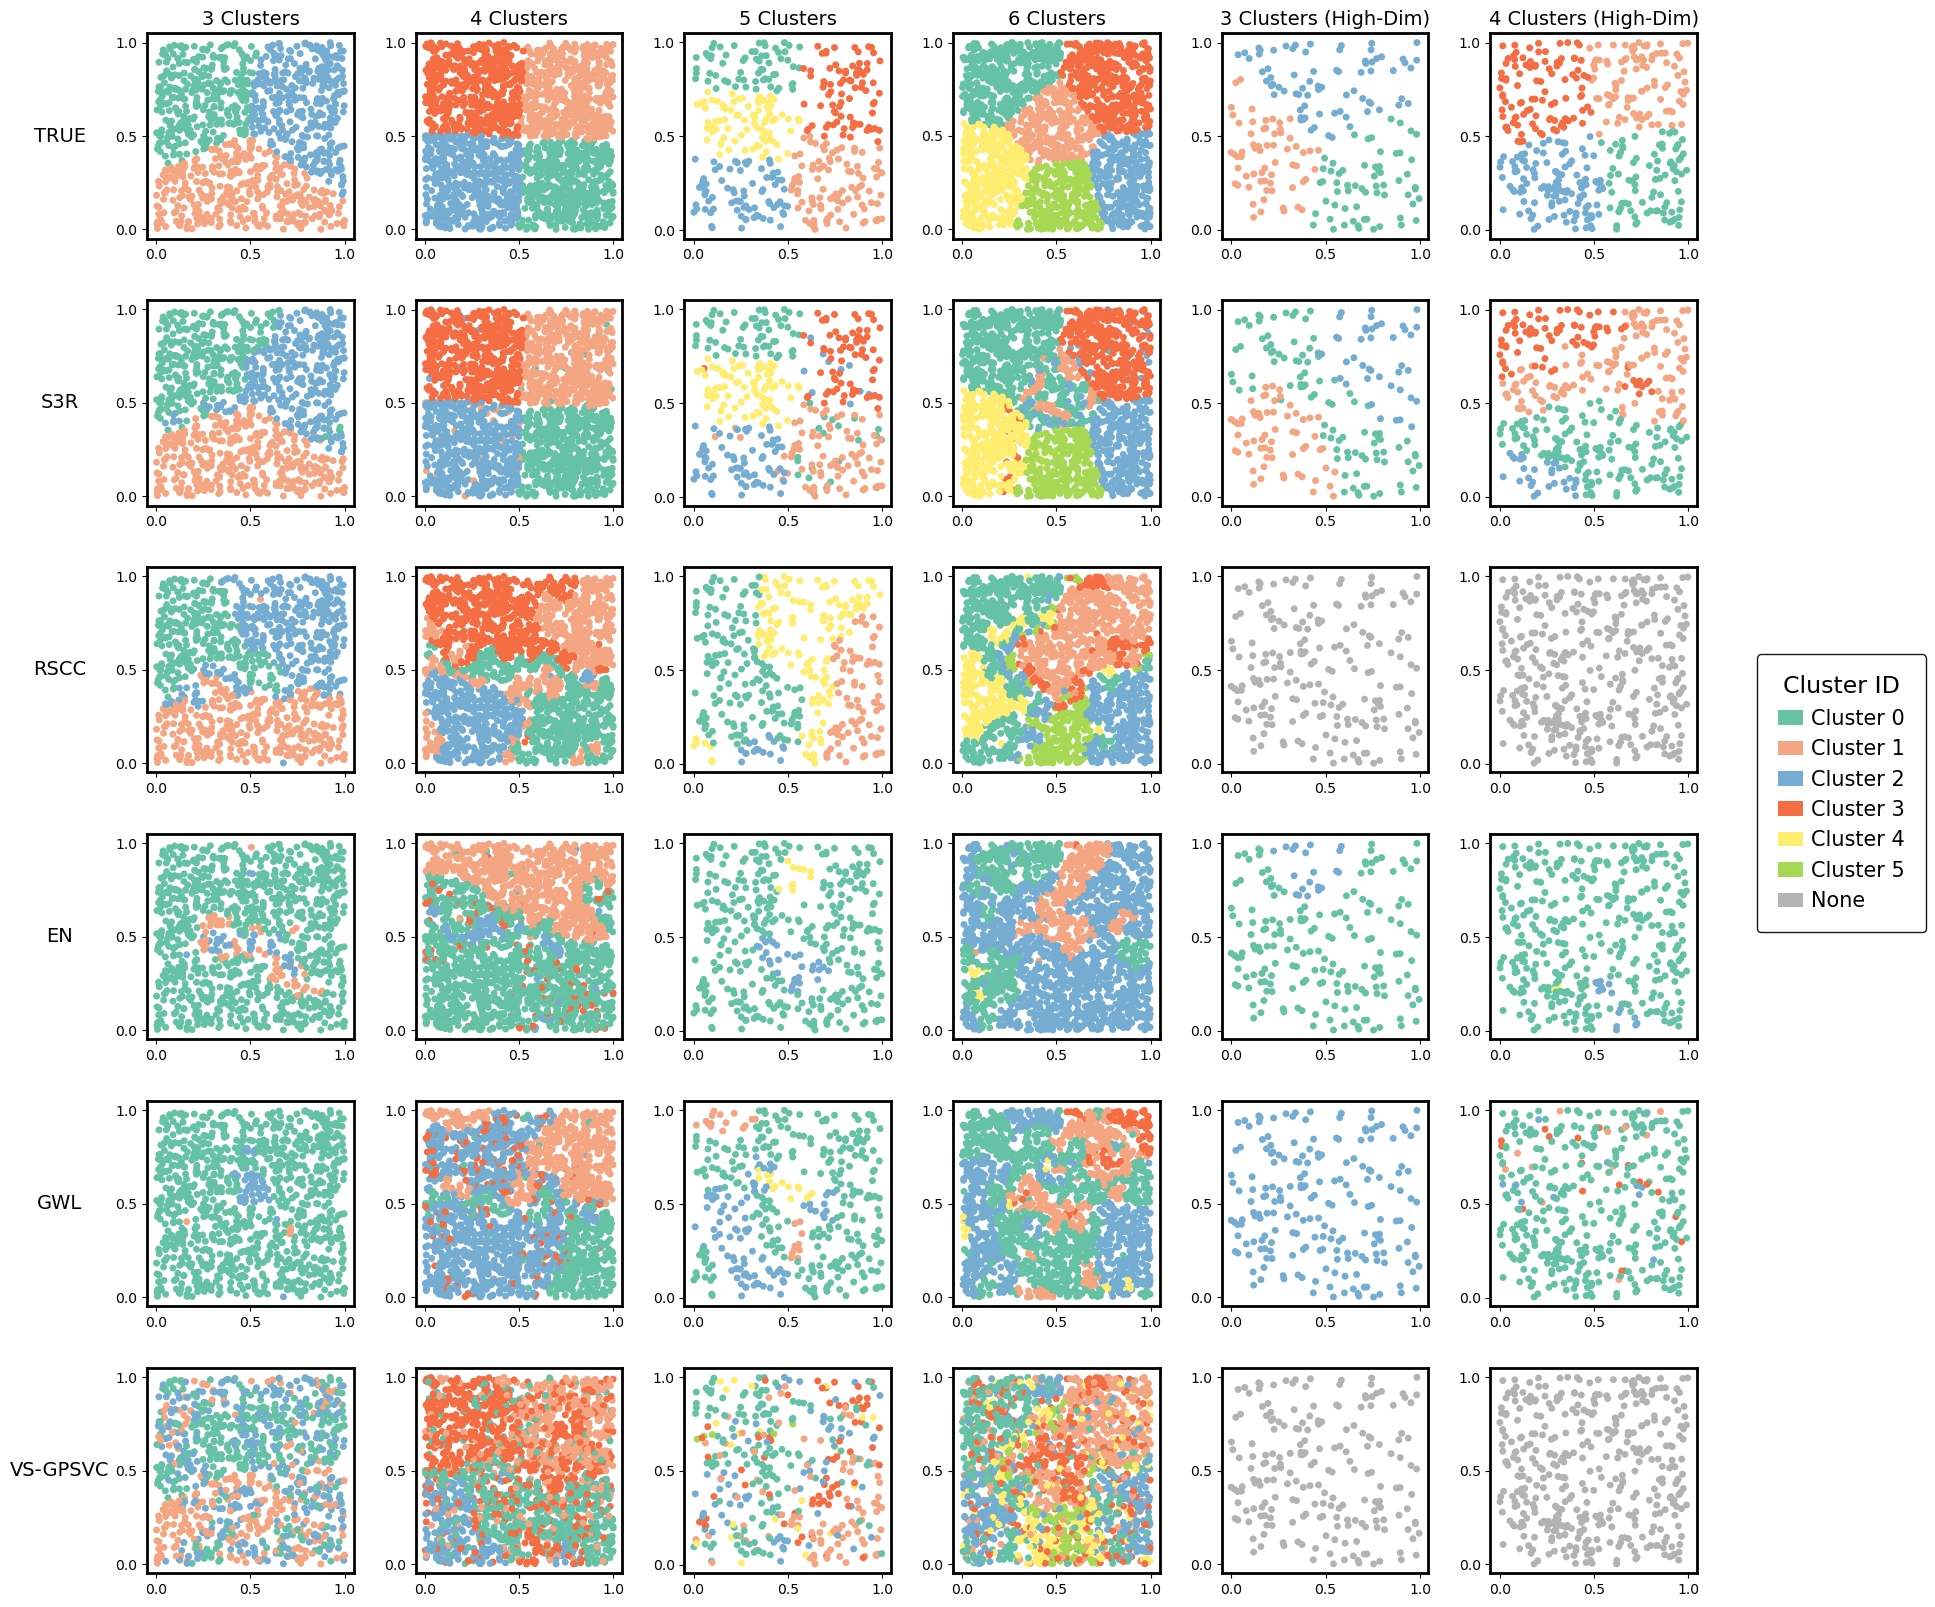

In [1]:
data_dir = "/Users/anz/Desktop/prep/save_Simu/all_simu_summary_results"

import matplotlib.pyplot as plt
import pandas as pd
import os
from matplotlib.colors import ListedColormap

fig_size = (20, 20)  
marker_size = 25    
border_linewidth = 2  
tick_label_size = 10 
title_fontsize = 14  
hspace = 0.3  
wspace = 0.3  


row_titles = ["TRUE", "S3R", "RSCC", "EN", "GWL", "VS-GPSVC"]
col_titles = ["3 Clusters", "4 Clusters", "5 Clusters", "6 Clusters", "3 Clusters (High-Dim)", "4 Clusters (High-Dim)"]

# Custom color palette
custom_colors = ["#66c2a5", "#f4a582", "#74add1", "#f46d43", "#ffed6f", "#a6d854", "#b3b3b3"]

# Create 6x6 grid of subplots
fig, axs = plt.subplots(6, 6, figsize=fig_size)
fig.subplots_adjust(hspace=hspace, wspace=wspace)

# Plot each subplot
for row in range(6):
    for col in range(6):
        ax = axs[row, col]
        # Read data from CSV
        file_path = os.path.join(data_dir, f"plot_{row * 6 + col}.csv")
        data = pd.read_csv(file_path)

        # Get actual cluster labels present in the data
        actual_clusters = sorted(data["cluster"].unique())
        color_map = ListedColormap([custom_colors[c] for c in actual_clusters])


        scatter = ax.scatter(data["x"], data["y"], c=data["cluster"], cmap=color_map, s=marker_size, edgecolor="none", linewidth=0.5)

        # Adjust ticks and labels
        ax.tick_params(axis='both', which='major', labelsize=tick_label_size)
        ax.set_xticks([0, 0.5, 1.0])
        ax.set_yticks([0, 0.5, 1.0])

        # Set titles for rows and columns
        if col == 0:
            ax.set_ylabel(row_titles[row], fontsize=title_fontsize, rotation=0, labelpad=40, va='center')
        if row == 0:
            ax.set_title(col_titles[col], fontsize=title_fontsize)

        # Set the border line width
        for spine in ax.spines.values():
            spine.set_linewidth(border_linewidth)

# Create custom legend based on clusters and colors used
from matplotlib.patches import Patch


labels = [f"Cluster {i}" for i in range(len(custom_colors) - 1)] + ["None"]

legend_elements = [
    Patch(facecolor=custom_colors[c], edgecolor="none", label=labels[c])
    for c in range(len(custom_colors))
]
# Add legend with custom settings
fig.legend(
    handles=legend_elements,
    title="Cluster ID",
    loc="center right",
    fontsize=tick_label_size+5,        
    title_fontsize=tick_label_size + 7, 
    borderaxespad=1.5,               
    handlelength=1.2,               
    handletextpad=0.4,              
    frameon=True,                   
    shadow=False,                  
    fancybox=True,                   
    framealpha=0.9,                 
    edgecolor="black",              
    bbox_to_anchor=(1.03, 0.5),      
    borderpad=1,                     
)

plt.show()
plt.close()



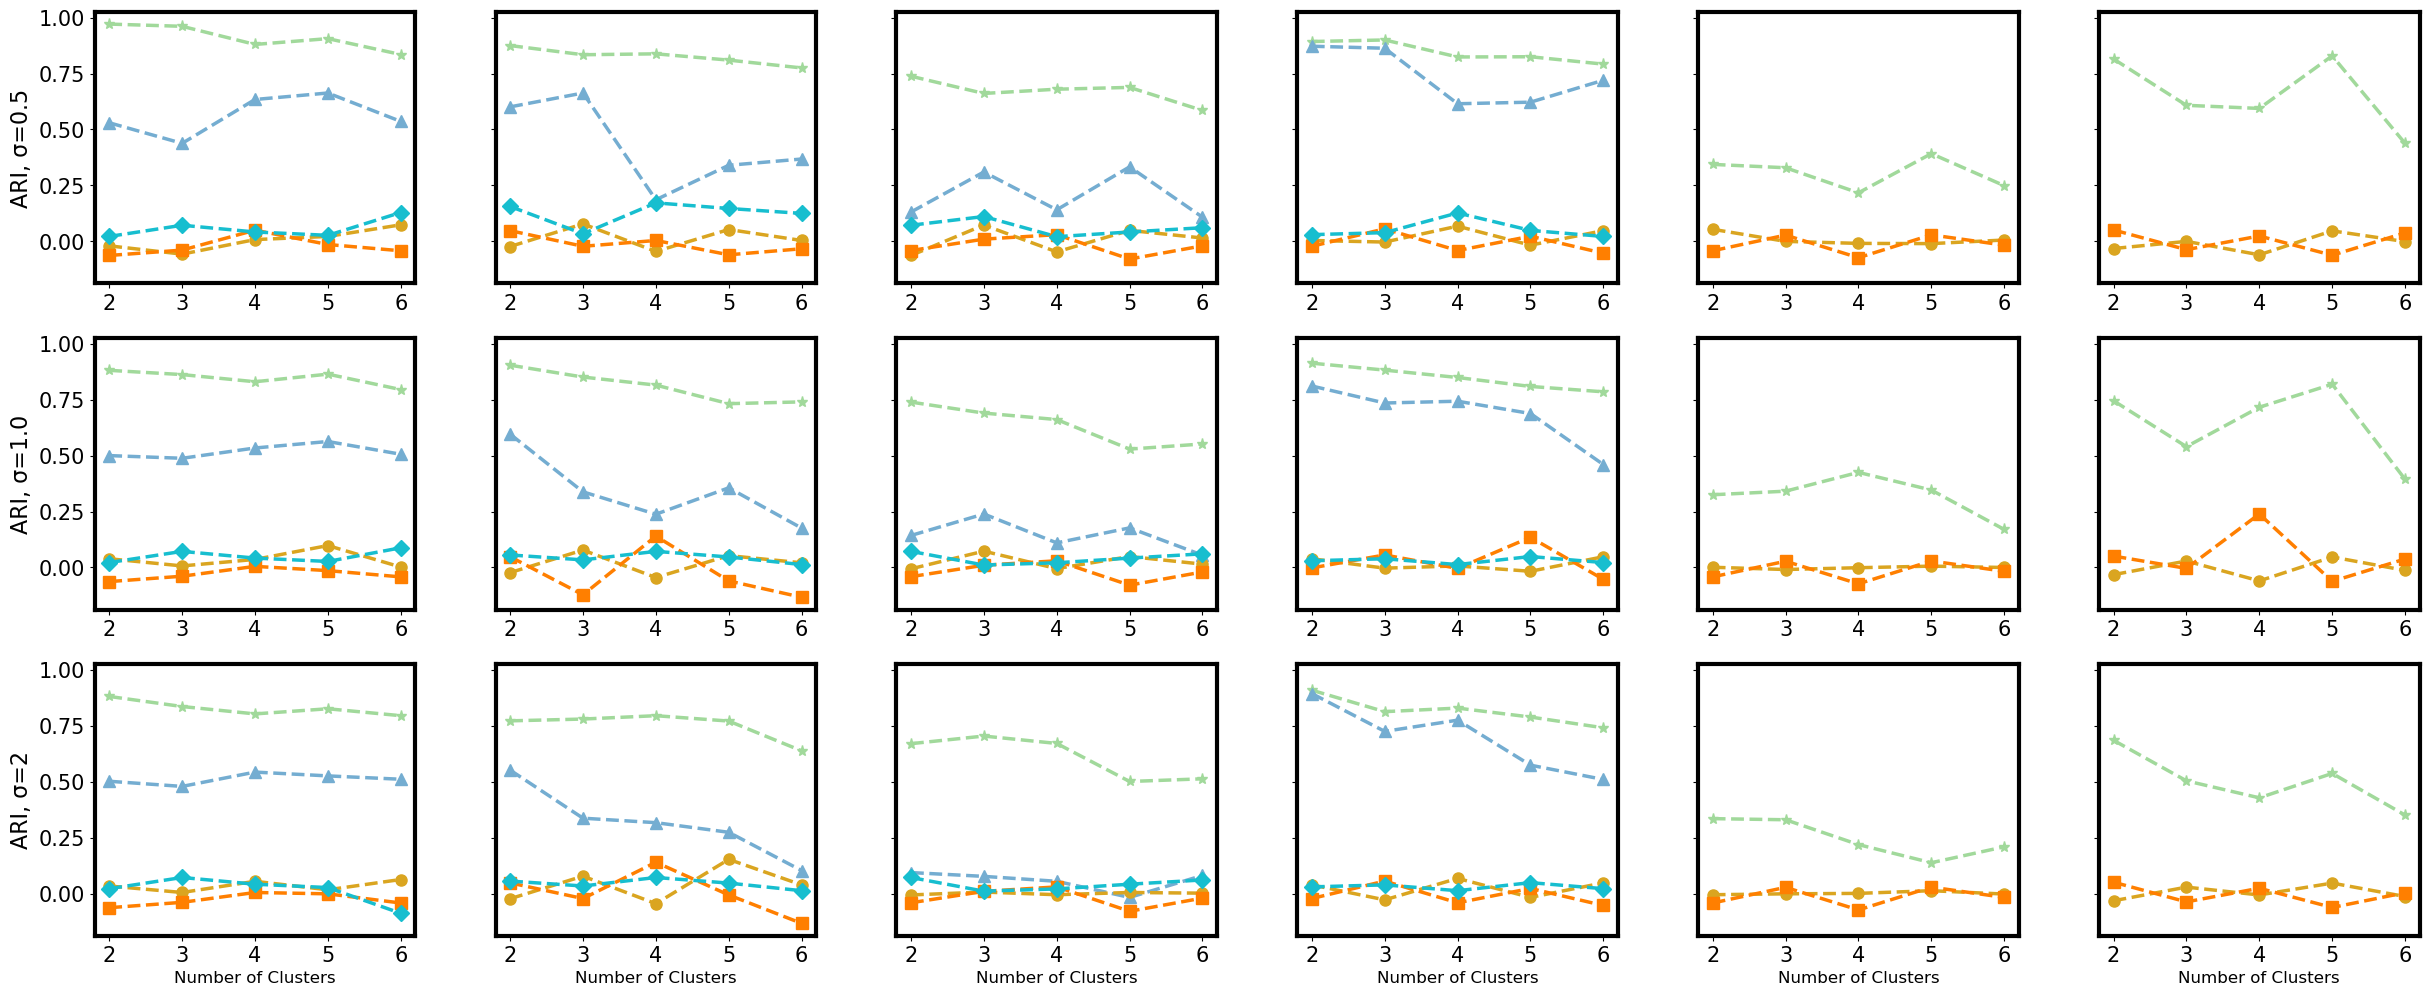

In [2]:
import pandas as pd

csv_path = "/Users/anz/Desktop/prep/save_Simu/ARI_results_summary.csv"
df = pd.read_csv(csv_path)


y_values_list = []
for dataset_id in sorted(df["dataset_index"].unique()):
    subset = df[df["dataset_index"] == dataset_id]
    entry = {}
    for _, row in subset.iterrows():
        entry[row["algorithm"]] = row[["k2","k3","k4","k5","k6"]].values
    y_values_list.append(entry)


import matplotlib.pyplot as plt
import numpy as np



marker_size = 8
line_width = 2.5
fig_size = (30, 12) 
border_linewidth = 3 
tick_label_size = 15  
hspace = 0.2  
wspace = 0.25 


x_values = np.array([2, 3, 4, 5, 6])

algorithms = list(y_values_list[0].keys())
markers = ['*', '^', 'o', 's', 'D']

colors = ['#a1d99b', '#74add1', 'goldenrod', '#ff7f00', 'tab:cyan']
# Create a 3x7 grid of subplots with custom spacing
fig, axs = plt.subplots(3, 6, figsize=fig_size, sharex=True, sharey=True)
fig.subplots_adjust(hspace=hspace, wspace=wspace)  # Adjust spacing between subplots

# Plot data on each subplot in the grid
for row in range(3):
    for col in range(6):
        ax = axs[row, col]
        
        idx = row * 6 + col
        if idx >= len(y_values_list):
            break  
        y_values = y_values_list[idx]  

        for alg_idx, alg in enumerate(algorithms):
            
            if y_values[alg] is None:
                continue  #
            ax.plot(x_values, y_values[alg], marker=markers[alg_idx], color=colors[alg_idx],
                    linestyle='--', markersize=marker_size, linewidth=line_width)
        

        ax.set_xticks(x_values)
        ax.tick_params(axis='x', which='both', labelsize=tick_label_size, labelbottom=True)

        ax.tick_params(axis='y', which='both', labelsize=tick_label_size)  # 调整 y 轴刻度标签大小

        if row == 2:
            ax.set_xlabel("Number of Clusters", fontsize=12)
        

        for spine in ax.spines.values():
            spine.set_linewidth(border_linewidth)

# Set shared y-axis labels for each row
axs[0, 0].set_ylabel("ARI, σ=0.5", fontsize=16)
axs[1, 0].set_ylabel("ARI, σ=1.0", fontsize=16)
axs[2, 0].set_ylabel("ARI, σ=2", fontsize=16)

plt.show()  
plt.close()  